# Set up

In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from importlib import reload
# from matplotlib import ticker

from RashbaJunction import (RashbaJunction, PureRashba, EnergyOutOfRangeError, InsulatorError)
from RashbaJunction.utilities import adjuct_Tick, make_grid, error_decorator
from RashbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/paper_plots_2/paper/"
FINAL_PATH = BASE_PATH+"fig_final/"


print(BASE_PATH)
print(FINAL_PATH)

k_so 6274572.777578376
x' 3.137286388789188
plots/paper_plots_2/paper/
plots/paper_plots_2/paper/fig_final/


In [2]:
font = {'family': "Times New Roman", "size": 25}

y_label = [r"$$ G [e^2/h]$$", r"$$T_0$$"]
x_label = [r"$E_F / E_Z$", "$E_F / E_{SO, L}$", "$E_F / E_{SO}$", "$k_{SO, L}\, d$", "$E_{SO, L} / E_{SO, R}$"]

y_label_pos = [(-.05, 1.03), (-.09, 1)]

# legend_font_size = 15
legend_font_size = 18

region_lbl = ["(a)", "(b)", "(c)"]

DPI = 110

# Single interface

## Different regimes

Pannello (a)
* curva 1: $2E_{SO(L)} = 3*E_Z; 2E_{SO(R)} = 0.5*E_Z$
* curva 2: $2_{ESO(L)} = 2*E_Z; 2E_{SO(R)} = 5*E_Z$
* curva 3: $2E_{SO(L)} = 0.3*E_Z; 2E_{SO(R)} = 0.5*E_Z$

Pannello (b)
* curva 1: $2E_{SO(L)} = -3*E_Z; 2E_{SO(R)} = 0.5*E_Z$
* curva 2: $2E_{SO(L)} = -2*E_Z; 2E_{SO(R)} = 5*E_Z$
* curva 3: $2E_{SO(L)} = -0.3*E_Z; 2E_{SO(R)} = 0.5*E_Z$

In [29]:
alp_r = -10
Eso_profile = [0, alp_r]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])

@error_decorator
def g(x, par):
    junction[0] = par[0]/2
    junction[1] = par[1]/2
    S = junction.get_scattering_matrix(x)
    if not S.is_unitary:
        print(f"not unitary matrix length: x-> {x}, par-> {par}")
        return np.nan
    else:
        return S.t_coef

# param: (E_so,L/E_z , E_so,R/E_z)
param = [(.3, .5+1e-8),
         (2, 5),
         (3, .5+1e-8),
        (-.3, .5+1e-8),
         (-2, 5),
        (-3, .5+1e-8)]

# param = [(.5+1e-8, .3),
#          (5, 2),
#          (.5+1e-8, 3),
#         (.5+1e-8, -.3),
#          (5, -2),
#         (.5+1e-8, -3)]

# curva nera (Zeeman-Zeeman): E_{SO,R}=0.2 EZ e E_{SO,L}=0.25 EZ
# curva rossa (Rashba-Rashba): E_{SO,R}=2 EZ e E_{SO,L}=2.5 EZ
# param = [(.2, .25),
#          (2, 2.5)]

# param = [(.25, .25),
#          (2.5, 2.5)]

# E/E_z
# de = 1e-5
# en = np.linspace(1-de , 1+de, num=1000)
en = np.arange(-1.25 + 1e-8, 2, 0.0011)

idx = np.abs(en + 1).argmin()
en[idx] = -1 + 1e-8

idx = np.abs(en - 1).argmin()
en[idx] = 1 - 1e-8

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(0.3, 0.50000001)
Inside one or both leads only evanescent modes

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(3, 0.50000001)
Inside one or both leads only evanescent modes are prese

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(-0.3, 0.50000001)
Inside one or both leads only evanescent 

In Weak Zeeman regime E = -1.25 < -Eso (1 + (Ez/2Eso)^2) = -1.25 x=-1.24999999, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(-3, 0.50000001)
Inside one or both leads only evanescent modes are 

0.3
2
3
plots/paper_plots_2/paper/fig_final/Fig_2_a.pdf


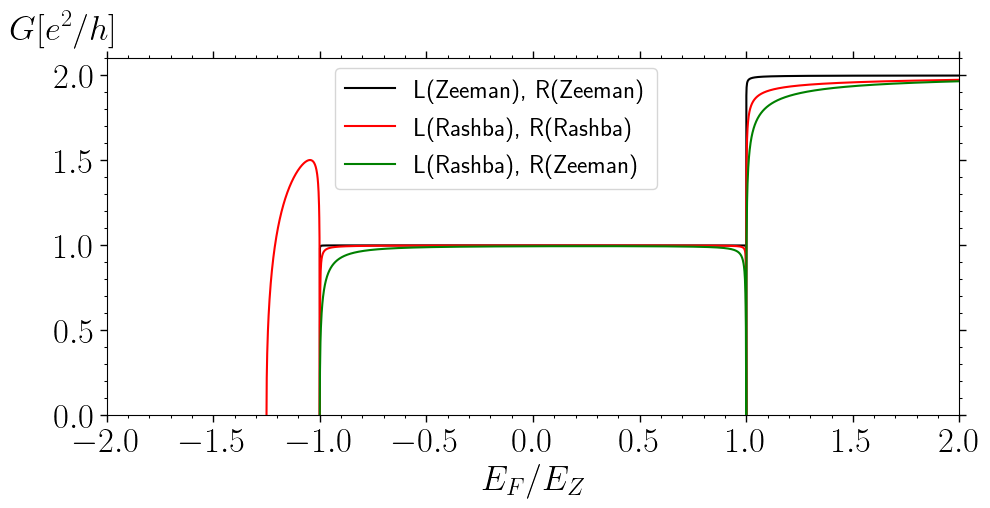

In [42]:
# %matplotlib notebook
# %matplotlib notebook
%matplotlib inline

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {2.0: "Rashba", 3.0: "Rashba", 5.0: "Rashba", 0.3: "Zeeman", 0.5: "Zeeman", 0: "Zeeman"}
# lable_map = {2.0: "Rashba", 3.0: "Rashba", 2.5: "Rashba", 0.2: "Zeeman", 0.25: "Zeeman", 0.5: "Zeeman"}
colors = ["black", "r", "g"]

# for i, k in enumerate(k_list[:3]):
for i, k in enumerate(k_list[:3]):
    print(k[0])
    lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
#     lbl_string = r"$2 E_{SO, L} = "f"{k[0]:.1f}"r"E_Z \ 2 E_{SO, R} ="f" {k[1]:.1f}E_Z$"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lbl_string, color=colors[i])


axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
axs.legend(fontsize = legend_font_size, bbox_to_anchor=(0.66, 0.6))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


SAVE = True
# SAVE = False
save_path = FINAL_PATH+f"Fig_2_a.pdf"
# save_path = FINAL_PATH+f"Fig_2_a(inverted).pdf"
# save_path = FINAL_PATH+f"Fig_2_a(values).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

-0.3
-2
-3
plots/paper_plots_2/paper/fig_final/Fig_2_b.pdf


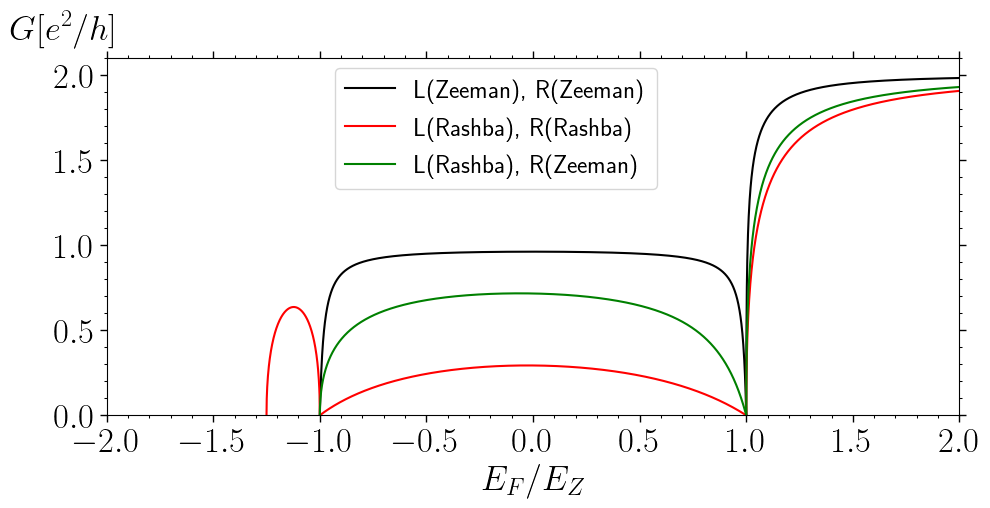

In [41]:
# %matplotlib notebook
# %matplotlib notebook
%matplotlib inline


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "g"]

lable_map = {-2.0: "Rashba", -3.0: "Rashba", 5.0: "Rashba", -0.3: "Zeeman", 0.5: "Zeeman"}
for i, k in enumerate(k_list[3:]):
    print(k[0])
    lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
#     lbl_string = r"$2 E_{SO, L} = "f"{k[0]:.1f}"r"E_Z \ 2 E_{SO, R} ="f" {k[1]:.1f}E_Z$"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lbl_string,
                    color= colors[i])
    
axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
axs.legend(fontsize = legend_font_size, bbox_to_anchor=(0.66, 0.6))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


SAVE = True
# SAVE = False
save_path = FINAL_PATH+f"Fig_2_b.pdf"
# save_path = FINAL_PATH+f"Fig_2_b(inverted).pdf"
# save_path = FINAL_PATH+f"Fig_2_b(values).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

### Wave function and Study

In [87]:
# ee = 0
ee = 1-1e-5
    # |f| 4.575582752797579
    # |g| 5.8805057034729975
# ee = 1-1e-7

alp_r = 1/4-1E-4
# profile: (E_so,l/E_z; E_so,R/E_z)
Eso_profile = np.array([3, .5+1e-8])/2
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])
S = junction.get_scattering_matrix(ee)

def total_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.delegate.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C[:2,:], np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C[2:, :], np.array(a))[0]*wf[:, 2]
        
        # print wave function coefficients 
#         if np.isclose(x, 0, atol = 1e-3):
#             print("left")
#             print(f"|r| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[0])}")
#             print(f"|pho| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            
    elif x > junction.interface[0]:
        junction.delegate.E_so = junction[1]    
        wf = junction.get_WF(x, E)
        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C[:2,:], np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C[2:, :], np.array(a))[1]*wf[:, 3]
        
        # print wave function coefficients 
#         if np.isclose(x, 0, atol = 1e-3):
#             print("rigth")
#             print(f"|t| {np.linalg.norm(np.dot(S.C[:2,:], np.array(a))[1])}")
#             print(f"|gamma| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
    return injected + reflected + evanescent

def evanescent_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.delegate.E_so = junction[0]
        wf = junction.get_WF(x, E)
        evanescent = np.dot(S.C[2:, :], np.array(a))[0]*wf[:, 2]
        # print wave function coefficients on the left of the interface
        if np.isclose(x, 0, atol = 1e-3):
            print(wf[:, 2])
#             print(evanescent/np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0]))
            print(f"|f| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[0])}")
            print(np.angle(np.dot(S.C[2:,:], np.array(a))[0])/np.pi)
            
            
    elif x > junction.interface[0]:
        junction.delegate.E_so = junction[1]    
        wf = junction.get_WF(x, E)
        evanescent = np.dot(S.C[2:, :], np.array(a))[1]*wf[:, 3]
        # print wave function coefficients on the rigth of the interface
        if np.isclose(x, 0, atol = 1e-3):
            print("#"*10)
            print(wf[:, 3])
#             print(evanescent/np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1]))
            print(f"|g| {np.linalg.norm(np.dot(S.C[2:,:], np.array(a))[1])}")
            print(np.angle(np.dot(S.C[2:,:], np.array(a))[1])/np.pi)
            

    return evanescent
    

    
real_1 = []
imag_1 = []

real_2 = []
imag_2 = []

ev_real_1 = []
ev_imag_1 = []

ev_real_2 = []
ev_imag_2 = []

# k_z*x
x_range = np.arange(-5, 5, 0.001)
for xx in x_range:
    r = total_WF(xx, ee)
    real_1.append(r[0].real)
    real_2.append(r[1].real)
    
    imag_1.append(r[0].imag)
    imag_2.append(r[1].imag)
    
    r2 = evanescent_WF(xx, ee)
    ev_real_1.append(r2[0].real)
    ev_real_2.append(r2[1].real)
    
    ev_imag_1.append(r2[0].imag)
    ev_imag_2.append(r2[1].imag)
    

[-0.70710036-0.0027386j  0.70710566+0.j       ]
|f| 4.575582752797579
0.97311494150606519594
##########
[-0.70710442+0.00182574j  0.70710678+0.j        ]
|g| 5.8805057034729975
0.97458767570222511976


plots/paper_plots_2/paper/waveFunction/wavefuncton_single_interface E = 0.9999999Ez.pdf


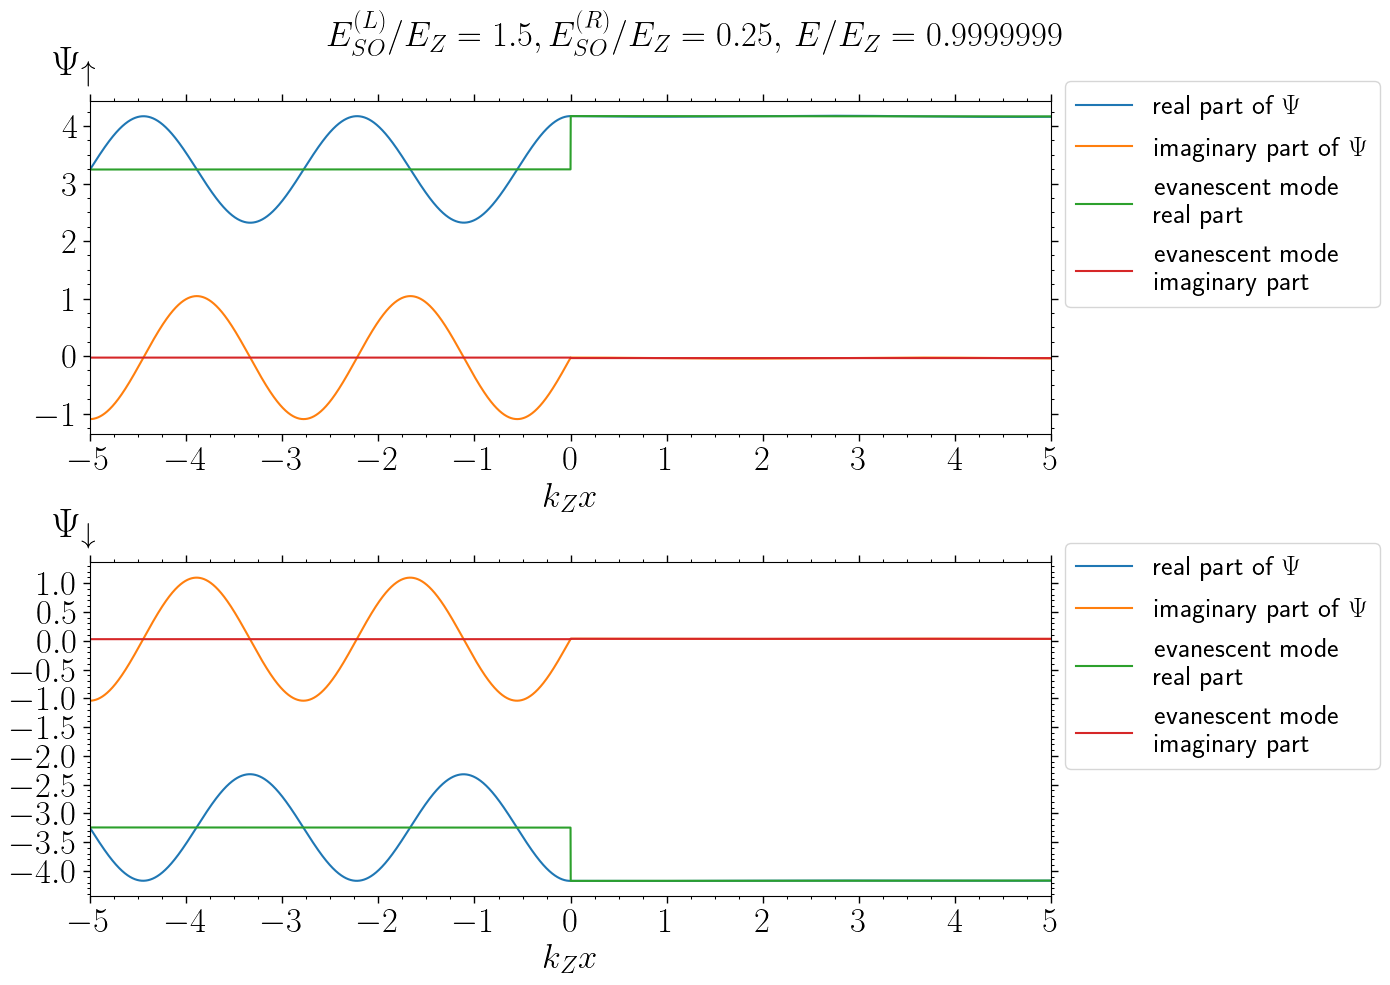

In [86]:
%matplotlib inline


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 1, figsize=(14, 10), dpi=100, tight_layout=True, facecolor='white')

labels_ = [r"real part of $\Psi$", 
           r"imaginary part of $\Psi$ ", 
           "evanescent mode\n real part", 
           "evanescent mode\n imaginary part"]

axs[0].plot(x_range, real_1, label=labels_[0])
axs[0].plot(x_range, imag_1, label=labels_[1])

axs[0].plot(x_range, ev_real_1, label=labels_[2])
axs[0].plot(x_range, ev_imag_1, label=labels_[3])

axs[1].plot(x_range, real_2, label=labels_[0])
axs[1].plot(x_range, imag_2, label= labels_[1])

axs[1].plot(x_range, ev_real_2, label=labels_[2])
axs[1].plot(x_range, ev_imag_2, label=labels_[3])

x_magior = np.array([1, 1])
x_minor = np.array([0.25, .25])

# y_magior = np.array([1, 1])
# y_minor = np.array([0.25, 0.25])
y_magior = np.array([1, 0.5])
y_minor = np.array([0.25, 0.1])
adjuct_Tick(axs, x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font['size'])

anchor = (1, 1.1)
y_label_pos2 = [(-.016, 1.04), (-.016, 1.04)]
y_label2 = [r"$\Psi_\uparrow$", r"$\Psi_\downarrow$"]
for j, i in enumerate(axs):
    i.set_xlabel(r"$k_Z x$", fontdict=font)
    i.set_ylabel(y_label2[j], rotation=0, fontdict=font, fontsize= 30)
    i.set_xlim(-5, 5)
    i.yaxis.set_label_coords(*y_label_pos2[j])
    
    i.legend(fontsize = 20, bbox_to_anchor=anchor)
#     i.grid(True)

    
fig.suptitle(fr"$$E_{{SO}}^{{(L)}}/E_Z= {Eso_profile[0]},  E_{{SO}}^{{(R)}}/E_Z={Eso_profile[1]:.2f}, \, E/E_Z = {ee}$$", fontsize=25)
# print(f"E_SO^(L)/E_Z= {Eso_profile[0]},  E_SO^(R)/E_Z={Eso_profile[1]},  E/E_Z = {ee}")

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"waveFunction/wavefuncton_single_interface E = {ee}Ez.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Different $E_Z$

Pannello a) $\alpha_L>0$ e $\alpha_R>0$
* curva 1: $E_Z=0$ (black dashed)
* curva 2: $E_Z=3*E_{SOL}$ (red)
* curva 3: $E_Z=0.5*E_{SOL}$ (black)

Pannello b) $\alpha_L<0$ e $\alpha_R>0$
* curva 1: $E_Z=0$ (black dashed)
* curva 2: $E_Z=3*E_{SOL}$ (red)
* curva 3: E$_Z=0.5*E_{SOL}$ (black)

In [3]:
import math
from RashbaJunction import PureRashba

# ESOR / ESOL=0.8 
al_r_to_al_l = 0.8
de = 1e-5

# al_r_to_al_l = 0.6
# de = 1e-4

alp_l = 1

Eso_profile = [alp_l, al_r_to_al_l * alp_l]
x_profile = [0]


junction = RashbaJunction([x_profile, Eso_profile])
pureRashba = RashbaJunction([x_profile, Eso_profile], wave_function_delegate = PureRashba)


def g(x, par):

    if par == 0:
        j = pureRashba
        j[0] = alp_l
        j[1] = abs(al_r_to_al_l*alp_l)
        
        m = max(-alp_l, -al_r_to_al_l*alp_l)
        m2 = 10
    else:
        j = junction
        j[0] = 1 / par
        j[1] = abs(al_r_to_al_l / par)
        
        a_l = abs(1/par)
        a_r = abs(al_r_to_al_l / par)
        
        m = max(-a_l*(1 + (1/2/a_l)**2), -a_r*(1 + (1/2/a_r)**2))
        m2 = min(a_l, a_r)
        
    try:
        S = j.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan

# param: (E_z/E_so,L)
param = [0, 3, 0.5, -0.5, -3]
# param = [3, 0.5]

en = np.arange(-3.1, 12, 0.0011)
# en = np.arange(-3.1, 4, 0.0011)


special_opoints = [-al_r_to_al_l*alp_l, -al_r_to_al_l/param[2]*(1+(1/2/al_r_to_al_l*param[2])**2), 1, -1]
err = [1e-9, 1e-10, -1e-9, 1e-9]
# special_opoints = [-al_r_to_al_l*alp_l, 1, -1]
# err = [1e-9, -1e-9, 1e-9]

for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])


inset_en = np.linspace(1-de , 1+de, num=1000)
inset_trasmission_coeff_total = make_grid(inset_en, [0.5], [g])

Pure Rashba E=-3.10 < -Eso = -0.80 x=-3.1, par=0
Pure Rashba E=-3.10 < -Eso = -0.80 x=-3.0989, par=0
Pure Rashba E=-3.10 < -Eso = -0.80 x=-3.0978, par=0
Pure Rashba E=-3.10 < -Eso = -0.80 x=-3.0967, par=0
Pure Rashba E=-3.10 < -Eso = -0.80 x=-3.0955999999999997, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.0944999999999996, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.0933999999999995, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.0922999999999994, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.0911999999999993, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.090099999999999, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.088999999999999, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.087899999999999, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.086799999999999, par=0
Pure Rashba E=-3.09 < -Eso = -0.80 x=-3.0856999999999988, par=0
Pure Rashba E=-3.08 < -Eso = -0.80 x=-3.0845999999999987, par=0
Pure Rashba E=-3.08 < -Eso = -0.80 x=-3.0834999999999986, par=0
Pure Rashba E=-3.08 < -Eso = -0

Pure Rashba E=-2.59 < -Eso = -0.80 x=-2.587399999999953, par=0
Pure Rashba E=-2.59 < -Eso = -0.80 x=-2.586299999999953, par=0
Pure Rashba E=-2.59 < -Eso = -0.80 x=-2.585199999999953, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.5840999999999528, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.5829999999999527, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.5818999999999526, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.5807999999999525, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.5796999999999524, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.5785999999999523, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.577499999999952, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.576399999999952, par=0
Pure Rashba E=-2.58 < -Eso = -0.80 x=-2.575299999999952, par=0
Pure Rashba E=-2.57 < -Eso = -0.80 x=-2.574199999999952, par=0
Pure Rashba E=-2.57 < -Eso = -0.80 x=-2.5730999999999518, par=0
Pure Rashba E=-2.57 < -Eso = -0.80 x=-2.5719999999999517, par=0
Pure Rashba E=-2.57 < -Eso = -0.80 x=-2.5708999

Pure Rashba E=-2.31 < -Eso = -0.80 x=-2.312399999999928, par=0
Pure Rashba E=-2.31 < -Eso = -0.80 x=-2.3112999999999277, par=0
Pure Rashba E=-2.31 < -Eso = -0.80 x=-2.3101999999999276, par=0
Pure Rashba E=-2.31 < -Eso = -0.80 x=-2.3090999999999275, par=0
Pure Rashba E=-2.31 < -Eso = -0.80 x=-2.3079999999999274, par=0
Pure Rashba E=-2.31 < -Eso = -0.80 x=-2.3068999999999273, par=0
Pure Rashba E=-2.31 < -Eso = -0.80 x=-2.3057999999999272, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.304699999999927, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.303599999999927, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.302499999999927, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.301399999999927, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.3002999999999267, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.2991999999999266, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.2980999999999265, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.2969999999999264, par=0
Pure Rashba E=-2.30 < -Eso = -0.80 x=-2.29589

Pure Rashba E=-1.76 < -Eso = -0.80 x=-1.7623999999998774, par=0
Pure Rashba E=-1.76 < -Eso = -0.80 x=-1.7612999999998773, par=0
Pure Rashba E=-1.76 < -Eso = -0.80 x=-1.7601999999998772, par=0
Pure Rashba E=-1.76 < -Eso = -0.80 x=-1.759099999999877, par=0
Pure Rashba E=-1.76 < -Eso = -0.80 x=-1.757999999999877, par=0
Pure Rashba E=-1.76 < -Eso = -0.80 x=-1.756899999999877, par=0
Pure Rashba E=-1.76 < -Eso = -0.80 x=-1.7562499999, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.7546999999998767, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.7535999999998766, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.7524999999998765, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.7513999999998764, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.7502999999998763, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.7491999999998762, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.748099999999876, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.746999999999876, par=0
Pure Rashba E=-1.75 < -Eso = -0.80 x=-1.74589999999

Pure Rashba E=-1.49 < -Eso = -0.80 x=-1.4884999999998523, par=0
Pure Rashba E=-1.49 < -Eso = -0.80 x=-1.4873999999998522, par=0
Pure Rashba E=-1.49 < -Eso = -0.80 x=-1.486299999999852, par=0
Pure Rashba E=-1.49 < -Eso = -0.80 x=-1.485199999999852, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4840999999998519, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4829999999998518, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4818999999998517, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4807999999998516, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4796999999998515, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4785999999998514, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4774999999998513, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.4763999999998512, par=0
Pure Rashba E=-1.48 < -Eso = -0.80 x=-1.475299999999851, par=0
Pure Rashba E=-1.47 < -Eso = -0.80 x=-1.474199999999851, par=0
Pure Rashba E=-1.47 < -Eso = -0.80 x=-1.4730999999998509, par=0
Pure Rashba E=-1.47 < -Eso = -0.80 x=-1.4719

Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.213499999999827, par=0
Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.212399999999827, par=0
Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.2112999999998268, par=0
Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.2101999999998267, par=0
Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.2090999999998266, par=0
Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.2079999999998265, par=0
Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.2068999999998264, par=0
Pure Rashba E=-1.21 < -Eso = -0.80 x=-1.2057999999998263, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.2046999999998262, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.2035999999998261, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.202499999999826, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.201399999999826, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.2002999999998258, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.1991999999998257, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.1980999999998256, par=0
Pure Rashba E=-1.20 < -Eso = -0.80 x=-1.1969

Pure Rashba E=-0.83 < -Eso = -0.80 x=-0.8262999999997915, par=0
Pure Rashba E=-0.83 < -Eso = -0.80 x=-0.8251999999997914, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8240999999997913, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8229999999997912, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8218999999997911, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.820799999999791, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8196999999997909, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8185999999997908, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8174999999997907, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8163999999997906, par=0
Pure Rashba E=-0.82 < -Eso = -0.80 x=-0.8152999999997905, par=0
Pure Rashba E=-0.81 < -Eso = -0.80 x=-0.8141999999997904, par=0
Pure Rashba E=-0.81 < -Eso = -0.80 x=-0.8130999999997903, par=0
Pure Rashba E=-0.81 < -Eso = -0.80 x=-0.8119999999997902, par=0
Pure Rashba E=-0.81 < -Eso = -0.80 x=-0.8108999999997901, par=0
Pure Rashba E=-0.81 < -Eso = -0.80 x=-0.8

In Weak Zeeman regime E = -2.69 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.6896999999999625, par=3
In Weak Zeeman regime E = -2.69 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.6885999999999624, par=3
In Weak Zeeman regime E = -2.69 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.6874999999999623, par=3
In Weak Zeeman regime E = -2.69 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.686399999999962, par=3
In Weak Zeeman regime E = -2.69 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.685299999999962, par=3
In Weak Zeeman regime E = -2.68 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.684199999999962, par=3
In Weak Zeeman regime E = -2.68 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.683099999999962, par=3
In Weak Zeeman regime E = -2.68 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.6819999999999617, par=3
In Weak Zeeman regime E = -2.68 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.6808999999999616, par=3
In Weak Zeeman regime E = -2.68 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.6797999999999615, par=3
In Weak Zeeman regime E = -2.68 < -Eso (1 + (Ez/2Eso)^2) = -1.20

In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4146999999999372, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.413599999999937, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.412499999999937, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.411399999999937, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.410299999999937, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4091999999999367, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4080999999999366, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4069999999999365, par=3
In Weak Zeeman regime E = -2.41 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4058999999999364, par=3
In Weak Zeeman regime E = -2.40 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4047999999999363, par=3
In Weak Zeeman regime E = -2.40 < -Eso (1 + (Ez/2Eso)^2) = -1.20

In Weak Zeeman regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0571999999999044, par=3
In Weak Zeeman regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0560999999999043, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0549999999999042, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.053899999999904, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.052799999999904, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.051699999999904, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.050599999999904, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0494999999999037, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0483999999999036, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0472999999999035, par=3
In Weak Zeeman regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.20

In Weak Zeeman regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8657999999998869, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8646999999998868, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8635999999998867, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8624999999998866, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8613999999998865, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8602999999998864, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8591999999998863, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.8580999999998862, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.856999999999886, par=3
In Weak Zeeman regime E = -1.86 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.855899999999886, par=3
In Weak Zeeman regime E = -1.85 < -Eso (1 + (Ez/2Eso)^2) = -1.

In Weak Zeeman regime E = -1.32 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3157999999998364, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3146999999998363, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3135999999998362, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3124999999998361, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.311399999999836, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.310299999999836, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3091999999998358, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3080999999998357, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3069999999998356, par=3
In Weak Zeeman regime E = -1.31 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.3058999999998355, par=3
In Weak Zeeman regime E = -1.30 < -Eso (1 + (Ez/2Eso)^2) = -1.

Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0407999999998112, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.039699999999811, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.038599999999811, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.037499999999811, par=3
Inside one or both leads only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0363999999998108, par=3
Inside o

In Rashba dominated regime E = -2.59 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.5917999999999535, par=0.5
In Rashba dominated regime E = -2.59 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.5906999999999534, par=0.5
In Rashba dominated regime E = -2.59 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.5895999999999533, par=0.5
In Rashba dominated regime E = -2.59 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.588499999999953, par=0.5
In Rashba dominated regime E = -2.59 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.587399999999953, par=0.5
In Rashba dominated regime E = -2.59 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.586299999999953, par=0.5
In Rashba dominated regime E = -2.59 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.585199999999953, par=0.5
In Rashba dominated regime E = -2.58 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.5840999999999528, par=0.5
In Rashba dominated regime E = -2.58 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.5829999999999527, par=0.5
In Rashba dominated regime E = -2.58 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.5818999999999526, pa

In Rashba dominated regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.061599999999905, par=0.5
In Rashba dominated regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0604999999999047, par=0.5
In Rashba dominated regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0593999999999046, par=0.5
In Rashba dominated regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0582999999999045, par=0.5
In Rashba dominated regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0571999999999044, par=0.5
In Rashba dominated regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0560999999999043, par=0.5
In Rashba dominated regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0549999999999042, par=0.5
In Rashba dominated regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.053899999999904, par=0.5
In Rashba dominated regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.052799999999904, par=0.5
In Rashba dominated regime E = -2.05 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.051699999999904, pa

In Rashba dominated regime E = -1.88 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8756999999998878, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8745999999998877, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8734999999998876, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8723999999998875, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8712999999998874, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8701999999998873, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8690999999998872, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.867999999999887, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.866899999999887, par=0.5
In Rashba dominated regime E = -1.87 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-1.8657999999998869, 

In Rashba dominated regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.1, par=-0.5
In Rashba dominated regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0989, par=-0.5
In Rashba dominated regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0978, par=-0.5
In Rashba dominated regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0967, par=-0.5
In Rashba dominated regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0955999999999997, par=-0.5
In Rashba dominated regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0944999999999996, par=-0.5
In Rashba dominated regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0933999999999995, par=-0.5
In Rashba dominated regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0922999999999994, par=-0.5
In Rashba dominated regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.0911999999999993, par=-0.5
In Rashba dominated regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-3.090099999999999, par=-0.5
In Rashba dominated regime E = -

In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.3629999999999325, par=-0.5
In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.3618999999999324, par=-0.5
In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.3607999999999323, par=-0.5
In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.359699999999932, par=-0.5
In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.358599999999932, par=-0.5
In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.357499999999932, par=-0.5
In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.356399999999932, par=-0.5
In Rashba dominated regime E = -2.36 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.355299999999932, par=-0.5
In Rashba dominated regime E = -2.35 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.3541999999999317, par=-0.5
In Rashba dominated regime E = -2.35 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.353099999999

In Rashba dominated regime E = -2.02 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0164999999999007, par=-0.5
In Rashba dominated regime E = -2.02 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0153999999999006, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0142999999999005, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0131999999999004, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0120999999999003, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0109999999999, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0098999999999, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0087999999999, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0076999999999, par=-0.5
In Rashba dominated regime E = -2.01 < -Eso (1 + (Ez/2Eso)^2) = -1.76 x=-2.0065999999999, par=

In Weak Zeeman regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.1, par=-3
In Weak Zeeman regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0989, par=-3
In Weak Zeeman regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0978, par=-3
In Weak Zeeman regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0967, par=-3
In Weak Zeeman regime E = -3.10 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0955999999999997, par=-3
In Weak Zeeman regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0944999999999996, par=-3
In Weak Zeeman regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0933999999999995, par=-3
In Weak Zeeman regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0922999999999994, par=-3
In Weak Zeeman regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.0911999999999993, par=-3
In Weak Zeeman regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.090099999999999, par=-3
In Weak Zeeman regime E = -3.09 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-3.088999999999999, par=-3
In Weak 

In Weak Zeeman regime E = -2.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4267999999999383, par=-3
In Weak Zeeman regime E = -2.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4256999999999382, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.424599999999938, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.423499999999938, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.422399999999938, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.421299999999938, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4201999999999377, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4190999999999376, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4179999999999375, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.4168999999999374, par=-3
In Weak Zeeman regime E = -2.42 < -Eso (1 + (Ez/2Eso)^

In Weak Zeeman regime E = -2.07 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.072599999999906, par=-3
In Weak Zeeman regime E = -2.07 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0714999999999058, par=-3
In Weak Zeeman regime E = -2.07 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0703999999999056, par=-3
In Weak Zeeman regime E = -2.07 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0692999999999055, par=-3
In Weak Zeeman regime E = -2.07 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0681999999999054, par=-3
In Weak Zeeman regime E = -2.07 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0670999999999053, par=-3
In Weak Zeeman regime E = -2.07 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.0659999999999052, par=-3
In Weak Zeeman regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.064899999999905, par=-3
In Weak Zeeman regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.063799999999905, par=-3
In Weak Zeeman regime E = -2.06 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-2.062699999999905, par=-3
In Weak Zeeman regime E = -2.06 < -Eso (1 + (Ez/2Eso)^

In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.713999999999873, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7128999999998729, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7117999999998728, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7106999999998727, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7095999999998726, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7084999999998725, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7073999999998724, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7062999999998723, par=-3
In Weak Zeeman regime E = -1.71 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.7051999999998722, par=-3
In Weak Zeeman regime E = -1.70 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.704099999999872, par=-3
In Weak Zeeman regime E = -1.70 < -Eso (1 + (Ez/2Eso

In Weak Zeeman regime E = -1.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4323999999998471, par=-3
In Weak Zeeman regime E = -1.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.431299999999847, par=-3
In Weak Zeeman regime E = -1.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.430199999999847, par=-3
In Weak Zeeman regime E = -1.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4290999999998468, par=-3
In Weak Zeeman regime E = -1.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4279999999998467, par=-3
In Weak Zeeman regime E = -1.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4268999999998466, par=-3
In Weak Zeeman regime E = -1.43 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4257999999998465, par=-3
In Weak Zeeman regime E = -1.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4246999999998464, par=-3
In Weak Zeeman regime E = -1.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4235999999998463, par=-3
In Weak Zeeman regime E = -1.42 < -Eso (1 + (Ez/2Eso)^2) = -1.20 x=-1.4224999999998462, par=-3
In Weak Zeeman regime E = -1.42 < -Eso (1 + (Ez/2Eso

In [9]:
de = 1e-5
inset_en = np.linspace(1 - 2*de , 1+ 2*de, num=1000)
inset_trasmission_coeff_total = make_grid(inset_en, [0.5], [g])

In [10]:
idx = np.abs(inset_en - 1).argmin()
inset_trasmission_coeff_total[3][0][idx] = 0
# trasmission_coeff_total[0.5][0][idx1] = 1
# trasmission_coeff_total[0.5][0][idx2] = 1

# trasmission_coeff_total[3][0][idx1] = 0

KeyError: 3

<IPython.core.display.Javascript object>


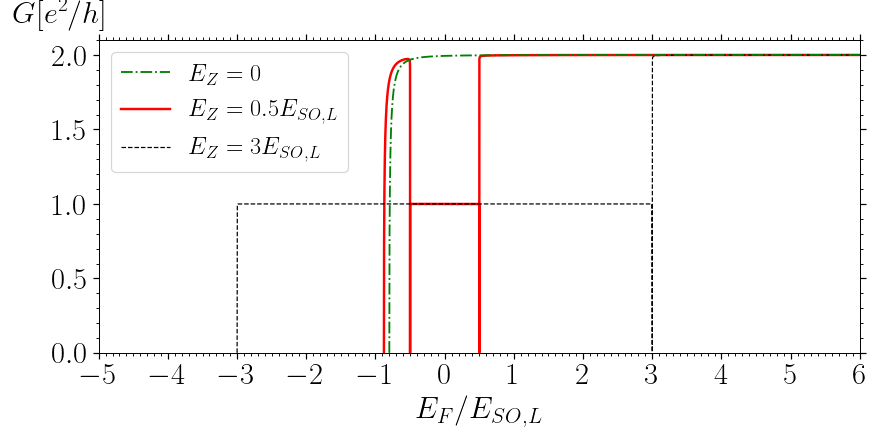

0.5
3
0
plots/paper_plots_2/paper/fig_final/without_inset_Fig_3_a(EsoR = 0.8 EsoL).pdf


In [24]:
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

inset_font =  {'family': "Times New Roman", "size": 10}
%matplotlib notebook
%matplotlib notebook
# %matplotlib inline

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=110, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["r", "black", "green"]
# colors = ["r", "black"]
stle = ["-", "dashed", "-."]
thickness = [2, 1, 1]
# for i, k in enumerate(k_list[1:3]+[k_list[0]]):
for i, k in enumerate(k_list[2:0:-1]+[k_list[0]]):
    print(k)
    if k == 0:
        axs.plot(en/alp_l, trasmission_coeff_total[k][0],
                   label=r"$E_Z = 0$", 
                     color=colors[i], 
                     linestyle=stle[i])
    else:
        axs.plot(en*k, trasmission_coeff_total[k][0],
                   label=r"$E_Z = "f"{k}"r"E_{SO, L}$", 
                 color=colors[i], 
                 linestyle=stle[i], 
                 linewidth=thickness[i]) 
axs.set_ylim(0,2.1)
axs.set_xlim(-5, 6)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2, 0, 1]
# order = [1,0]
#add legend to plot
legend_font_size2 = 20
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = legend_font_size2)
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)

axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
# ax2 = plt.axes([0,0,1,1])
# ax2.plot(0.5*inset_en, inset_trasmission_coeff_total[0.5][0], color="r", linestyle="-")


# x_magior = np.array([1*de])
# # x_magior = np.array([0.5])
# x_minor = np.array([1*de])

# y_magior = np.array([0.5])
# y_minor = np.array([0.5])
# adjuct_Tick(np.array([ax2]), x_magior=x_magior, 
#                     x_minor=x_minor, 
#                     y_magior=y_magior, 
#                     y_minor=y_minor, 
#                     size = inset_font["size"])

# ax2.set_xticks([.5-de, .5, .5+de])
# ax2.set_xticklabels([r"$0.5 \! - \! 10^{"f"{int(np.log10(de))}""}$", 
#                      "$0.5$", 
#                      r"$0.5 \! + \! 10^{"f"{int(np.log10(de))}""}$"], fontdict=inset_font, family = "times new roman")

# ax2.set_ylim(0, 2)
# # ax2.set_xlim(-3, 3)
# ax2.set_xlim(.5-1*de , .5+1*de)

# # ax2.set_xlabel(r"$E_F / E_{SO, L}-3 [ \times 10^{"f"{int(np.log10(de))}""}]$", 
# inset_font["size"] = 14
# ax2.set_xlabel(r"$E_F / E_{SO, L}$", 
#                fontdict=inset_font, 
#                 labelpad= 4)

# # ax2.set_ylabel(y_label[0], rotation=0, fontdict=inset_font)
# # ax2.yaxis.set_label_coords(*y_label_pos[0])


# # Manually set the position and relative size of the inset axes within ax1
# # ip = InsetPosition(axs, [0.79,0.16, 0.13,0.6])
# ip = InsetPosition(axs, [0.83,0.25, 0.12,0.6])
# ax2.set_axes_locator(ip)

SAVE = True
# SAVE = False
# save_path = FINAL_PATH+f"Fig_3_a(EsoR = {al_r_to_al_l} EsoL).pdf"
save_path = FINAL_PATH+f"without_inset_Fig_3_a(EsoR = {al_r_to_al_l} EsoL).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


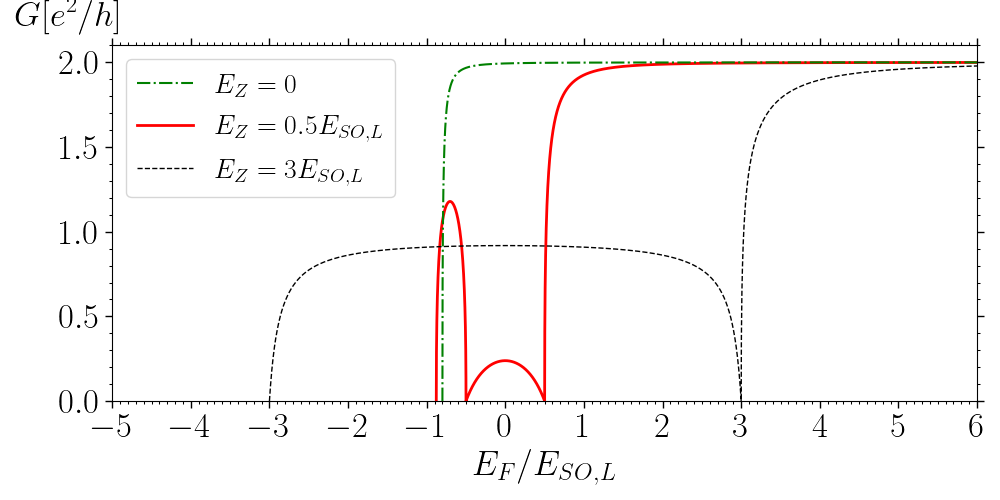

-0.5
-3
0
plots/paper_plots_2/paper/fig_final/Fig_3_b(EsoR = 0.8 EsoL).pdf


In [22]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["r", "black", "green"]
# colors = ["r", "black"]
stle = ["-", "dashed", "-."]
thickness = [2, 1, 1]
for i, k in enumerate(k_list[3:]+[k_list[0]]):
# for i, k in enumerate(k_list[:2:-1]+[k_list[0]]):
    print(k)
    if k == 0:
        axs.plot(en/alp_l, trasmission_coeff_total[k][0],
                   label=r"$E_Z = 0$", 
                     color=colors[i], 
                     linestyle=stle[i])
    else:
        axs.plot(en*abs(k), trasmission_coeff_total[k][0],
                   label=r"$E_Z = "f"{abs(k)}"r"E_{SO, L}$", 
                 color=colors[i], 
                 linestyle=stle[i], 
                 linewidth=thickness[i]) 
axs.set_ylim(0,2.1)
axs.set_xlim(-5, 6)


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2, 0, 1]
#add legend to plot

legend_font_size2 = 20
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = legend_font_size2)
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)

axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

SAVE = True
# SAVE = False
# save_path = FINAL_PATH+f"Fig_3_b.pdf"
save_path = FINAL_PATH+f"Fig_3_b(EsoR = {al_r_to_al_l} EsoL).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# 2 interfaces

## Nanowire contacted to lead

CONFIGURAZIONE NANOWIRE CONTACTED TO LEADS

pannello (a) $k_Z*d=0.1$
* $E_{SO}=0.1*E_Z$ (curva nera)
* $E_{SO}=0.4*E_Z$ (curva rossa)
* $E_{SO}=10*E_Z$ (curva verde) 

pannello (b) $k_Z*d=20$
* $E_{SO}=0.1*E_Z$ (curva nera)
* $E_{SO}=0.4*E_Z$ (curva rossa)
* $E_{SO}=10*E_Z$ (curva verde) 

In [9]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])

# an alternative to @error_decorator
# trreat errors explicitly
def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] /2
    junction.interface[1] = par[0] / 2
    
    try:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nanef

# param: (E_so/E_z, k_z*d)
param = [(.1, .1), (.1, .4), (.1, 10), (10, .1), (10, .4), (10, 10)]

en = np.arange(-1+1e-7, 1.5, 0.0011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

<IPython.core.display.Javascript object>


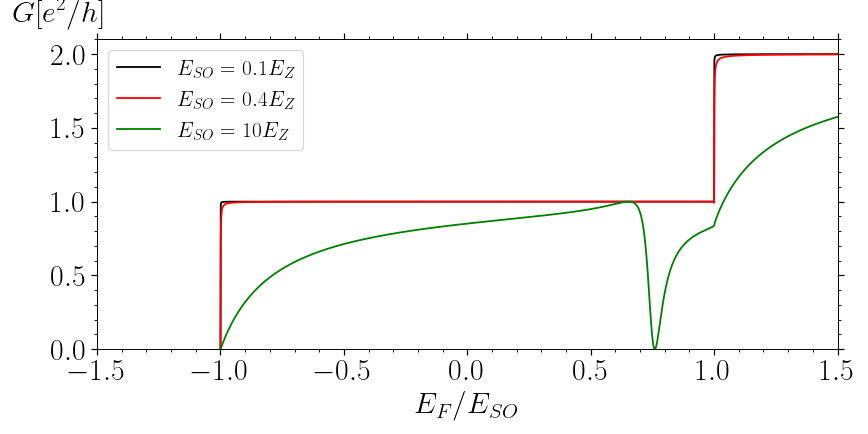

(0.1, 0.1)
(0.1, 0.4)
(0.1, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire_kZd=0.1.pdf


In [11]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "green"]
for i, k in enumerate(k_list[:3]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{k[1]}"r"E_Z$", color=colors[i])

axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)

axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"Finite_rashba_nanowire_kZd={k[0]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


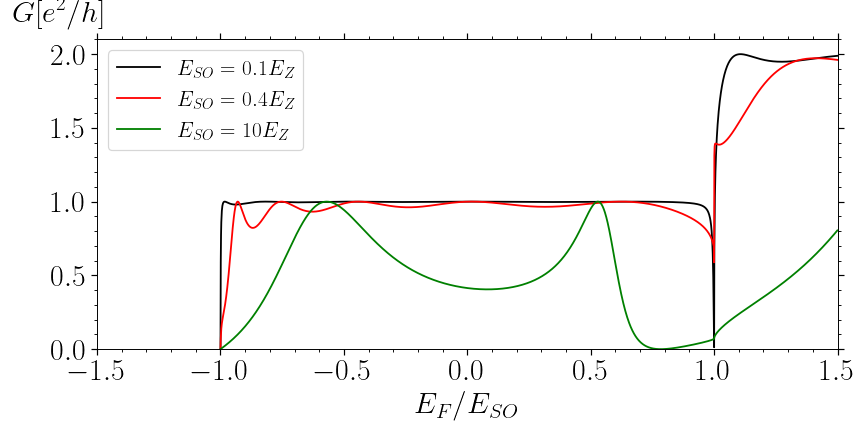

(10, 0.1)
(10, 0.4)
(10, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire_kZd=10.pdf


In [12]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())


colors = ["black", "r", "green"]
for i, k in enumerate(k_list[3:6]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{abs(k[1])}"r"E_Z$", color=colors[i])

axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array(.5)
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# SAVE = True
SAVE = False
# off = 0
save_path = BASE_PATH+f"Finite_rashba_nanowire_kZd={k[0]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Magnetic barier

### Conductance as a function of $E_F/E_Z$

$E_{SOL}=3*E_Z$ $E_{SOR} = 1.5 E_Z$ 

* panel (a) $k_Z*d=0.3/\sqrt{3}$ which should correspond to $k_{SOL}*d=0.3$
* panel (b) $k_Z*d=2/\sqrt{3}$ which should correspond to $k_{SOL}*d=2$
* panel (c) $k_Z*d=10/\sqrt{3}$ which should correspond to $k_{SOL}*d=10$

In each panel there should be two curves (to be indicated in the legenda)
* black curve ($\alpha_L>0 \  \alpha_R>0$)
* red curve ($\alpha_L<0 \  \alpha_R>0$)

The x-axis should go from -2 to +2 a intervalli di 0.5 e la label dovrebbe essere E_F/EZ.

In [53]:
alp_l = 3
# alp_r = 3
alp_r = 1.5
Eso_profile = [alp_l, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[0] = par[1] * alp_l
    junction.interface[0] = -par[0] /2/np.sqrt(alp_l)
    junction.interface[1] = par[0] / 2/np.sqrt(alp_l)
    
    try:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan


# param: (E_so,R/E_so,L , k_so,L*d)        
# param = [(.3, 1), (.3, -1), (2, 1), (2, -1), (10, 1), (10, -1)]

# param = [(.3, 1), (.3, -1)]
param = [(.3, -1), (.1, -1)]
# param = [(.3, 1), (.01, 1)]

# E/E_z
# en = np.arange(-2, 2, 0.00011)
# en = np.arange(-1.8, 2, 0.0011)

# de = 2e-2
de = 1e-1
xe = 1
# en = np.linspace(-1-de , -1+de, num=1000)
en = np.linspace(xe-de , xe+de, num=1000)


# special_opoints = [1, -1, -alp_r*(1+(1/(2*alp_r))**2)]
special_opoints = [xe]
err = [-xe*1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

<IPython.core.display.Javascript object>


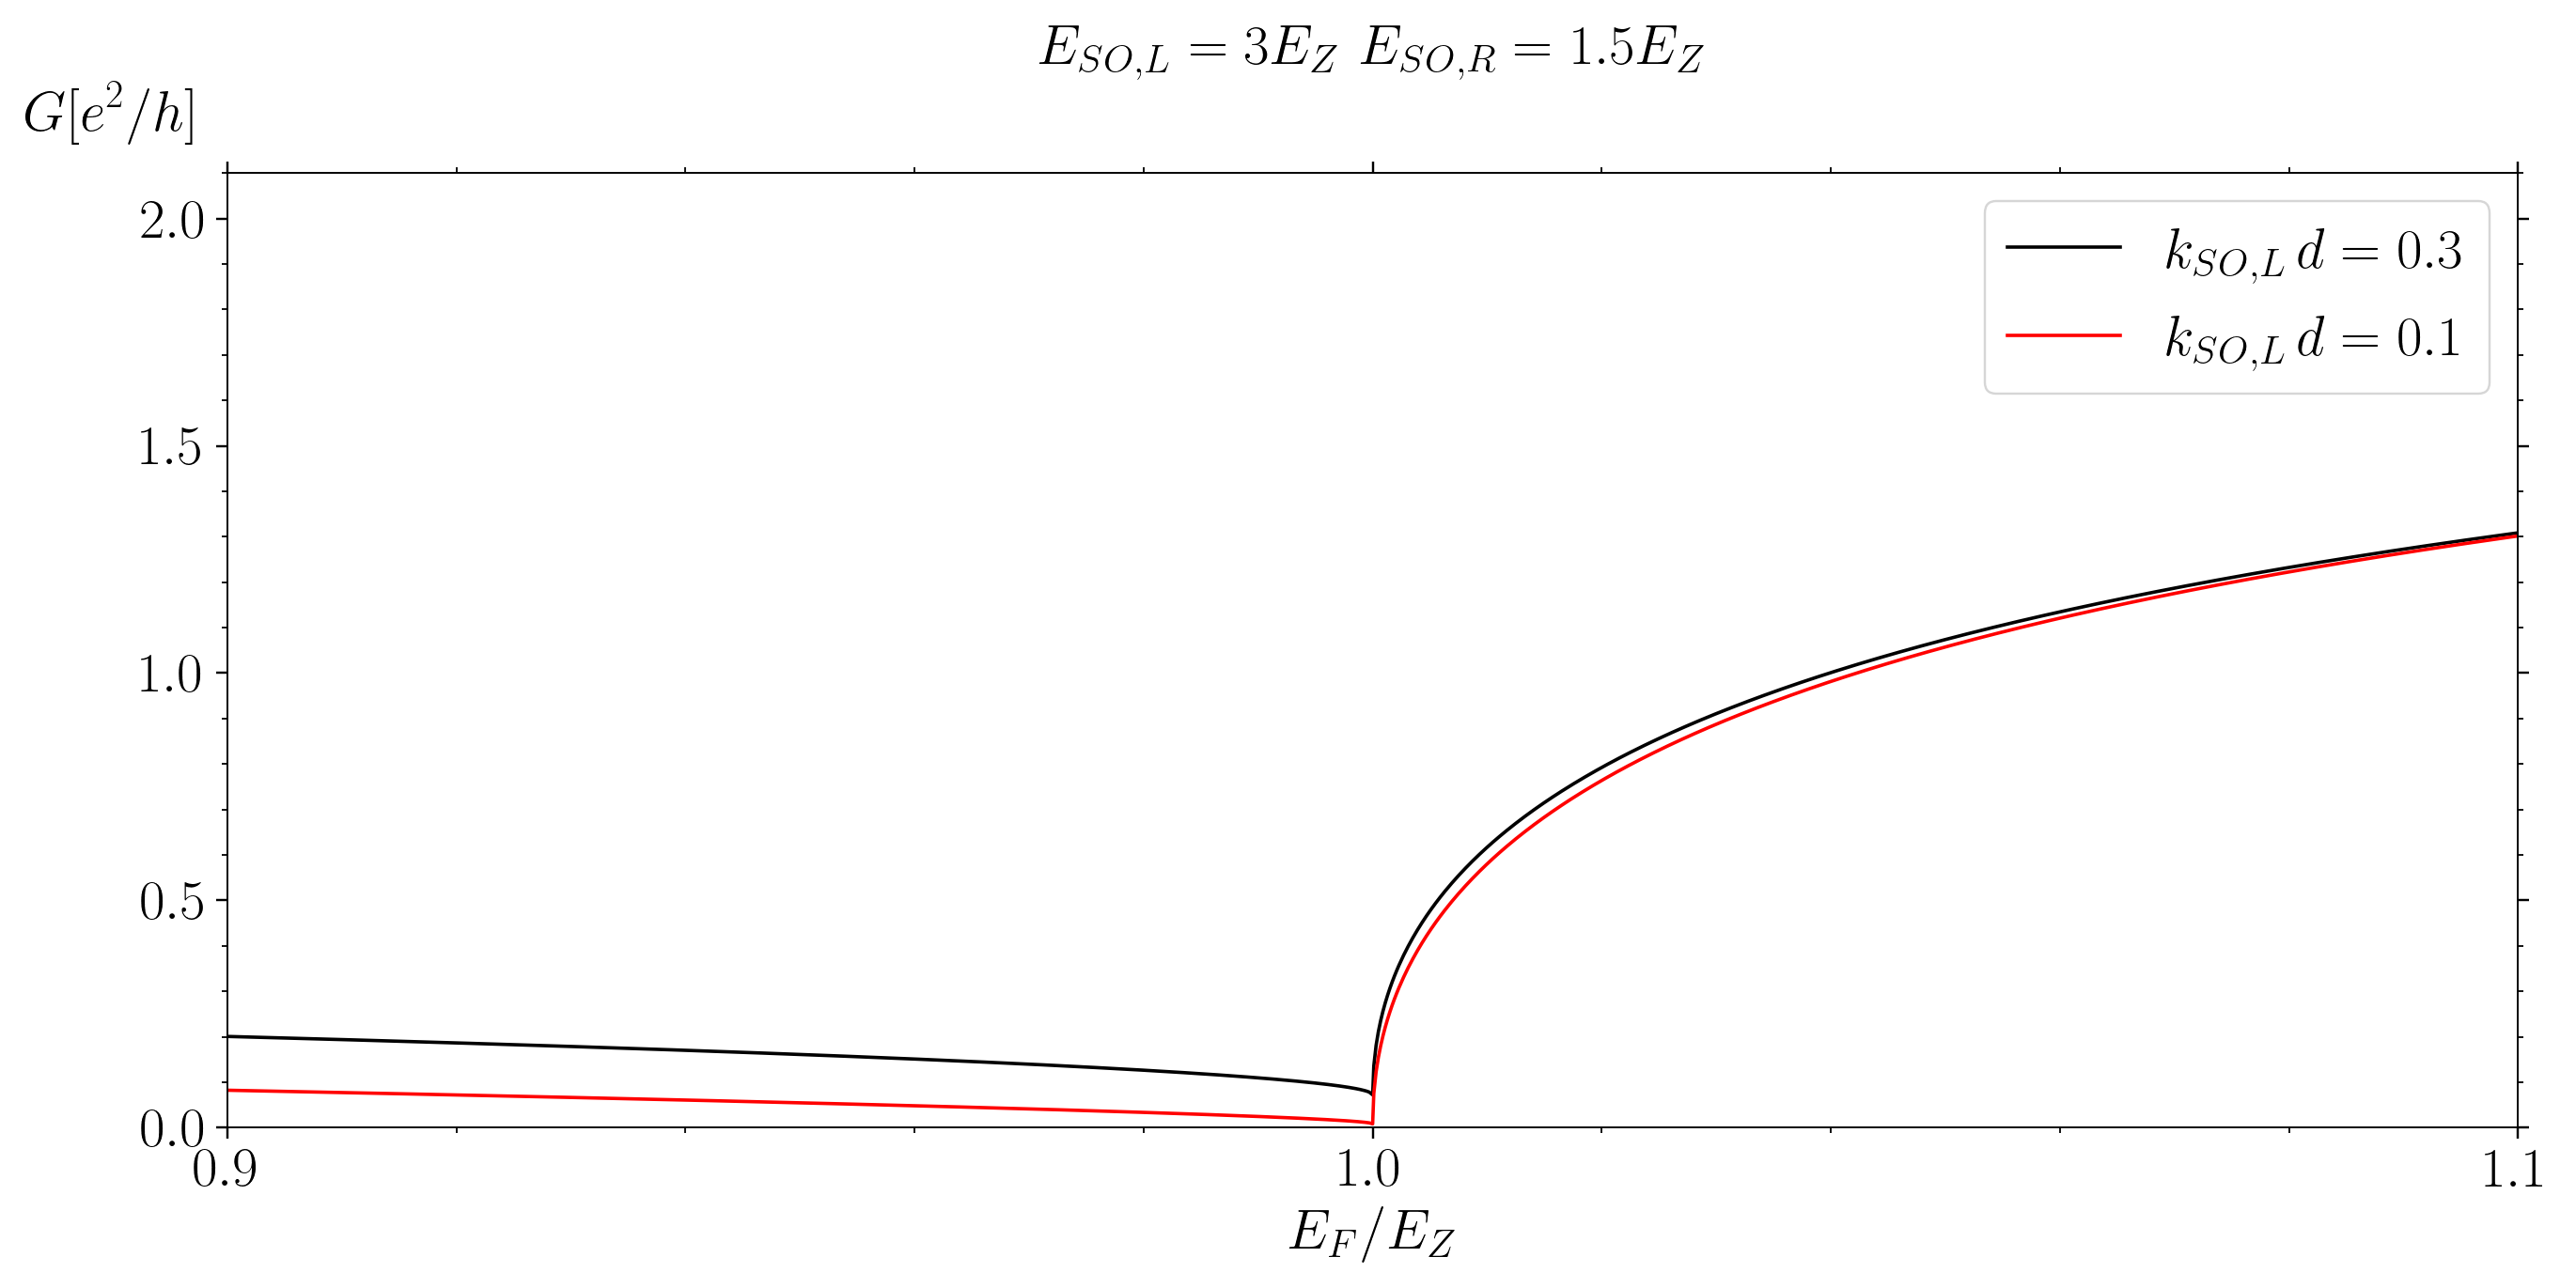

0.3
0.1
plots/paper_plots_2/paper/fig_final/details_Fig_5_a(E = 1 Ez).pdf


In [54]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}

colors = ["black", "r"]

for i, k in enumerate(k_list[:2]):
    print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
#                    label=lable_map[k[1]], color=colors[i])
                   label=r"$k_{SO, L} \, d = "f"{k[0]}""$", color=colors[i])
            


axs.set_ylim(0,2.1)
# axs.set_xlim(-2, 2)
axs.set_xlim(xe-de, xe+de)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

# x_magior = np.array([.01])
# x_minor = np.array([0.002])
x_magior = np.array([.1])
x_minor = np.array([0.02])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

plt.title(r"$E_{SO,L} = "f"{alp_l}""E_Z \ E_{SO,R} = "f"{alp_r}""E_Z$", 
              fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
# save_path = FINAL_PATH+f"Fig_5_a.pdf"
save_path = FINAL_PATH+f"details_Fig_5_a(E = {xe} Ez).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


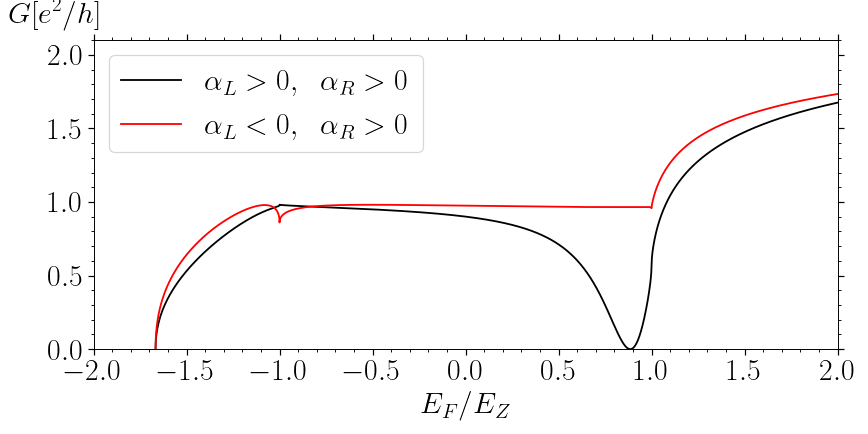

2
2
plots/paper_plots_2/paper/fig_final/Fig_5_c.pdf


In [15]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}

colors = ["black", "r"]

for i, k in enumerate(k_list[2:4]):
    print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])


axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# SAVE = True
SAVE = False
save_path = FINAL_PATH+f"Fig_5_c.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


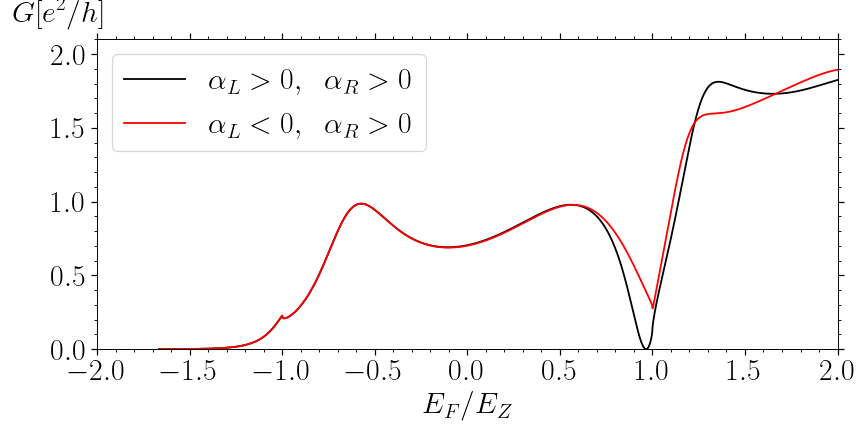

10
10
plots/paper_plots_2/paper/fig_final/Fig_5_b.pdf


In [8]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}

colors = ["black", "r"]

for i, k in enumerate(k_list[4:]):
    print(k[0])
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])

axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# SAVE = True
SAVE = False
save_path = FINAL_PATH+f"Fig_5_b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

### Conductance as a function of $k_{SOL}*d$ [from 0.1 to 20]

$E_{SOL} = 3*E_Z$ $E_{SOR} = 1.5 E_Z$

(nel codice farai variare $k_Z*d$, ma poi per fare il grafico la colonna delle x dovrà contenere $k_{SOL}*d=\sqrt{3}*kZ*d$, quindi $k_Z*d$ dovrà variare da $0.1/\sqrt{3}$ a $20/\sqrt{3}$)

panel (a) $\alpha_L>0 \  \alpha_R>0$
* 3 curves displaying the conductance at fixed energy
* $E=0$ (black)
* $E=+0.8*E_Z$ (red)
* $E=-0.8*E_Z$(green)

panel (b)   $\alpha_L<0 \  \alpha_R>0$
* 3 curves displaying the conductance at fixed energy
* $E=0$ (black)
* $E=+0.8*E_Z$ (red)
* $E=-0.8*E_Z$(green)

In [10]:
alp_l = 3
alp_r = 1.5
Eso_profile = [alp_l, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[0] = par[0] * alp_l
    junction.interface[0] = -x /2/np.sqrt(alp_l)
    junction.interface[1] = x /2/np.sqrt(alp_l)
    
    try:
        S = junction.get_scattering_matrix(par[1])
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan

# parm (sgn(E_so,L) , E/E_z)
param = [(1, 0), (1, .8), (1, -.8), (-1, 0), (-1, .8), (-1, -.8)]
# k_so,L*d
en = np.arange(0., 20, 0.011)


trasmission_coeff_total = make_grid(en, param, [g])#, gp])

<IPython.core.display.Javascript object>


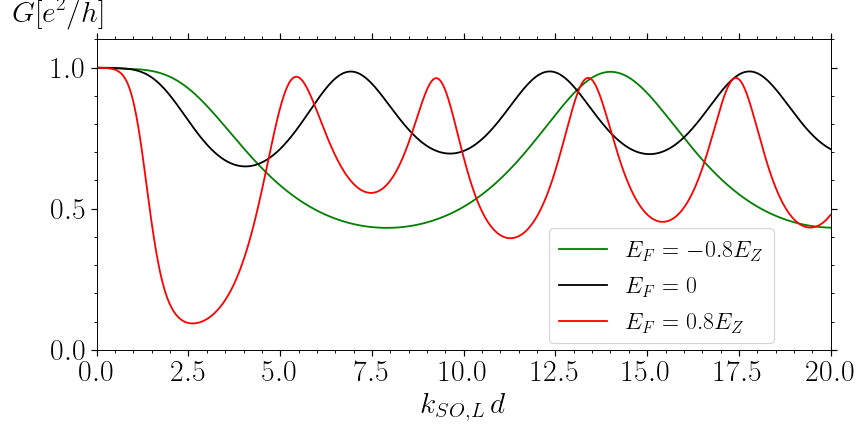

(1, -0.8)
(1, 0)
(1, 0.8)
plots/paper_plots_2/paper/magnetic barier in function of kso*d, Eso=(3, 0, 1.5).pdf


In [11]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["green", "black", "r"]
for i, k in enumerate([k_list[2]]+k_list[:2]):
    print(k)
    if k[1] == 0:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = 0$", color=colors[i])
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = "f"{k[1]}"r"E_Z$", color=colors[i])


axs.set_ylim(0,1.1)
axs.set_xlim(0, 20)

# axs.grid()
legend_font_size2 = 20
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.6, 0.43))
axs.set_xlabel(x_label[3], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([2.5])
x_minor = np.array([0.5])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


# SAVE = True
SAVE = False

save_path = BASE_PATH+f"magnetic barier in function of kso*d, Eso=({alp_l}, 0, {alp_r}).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


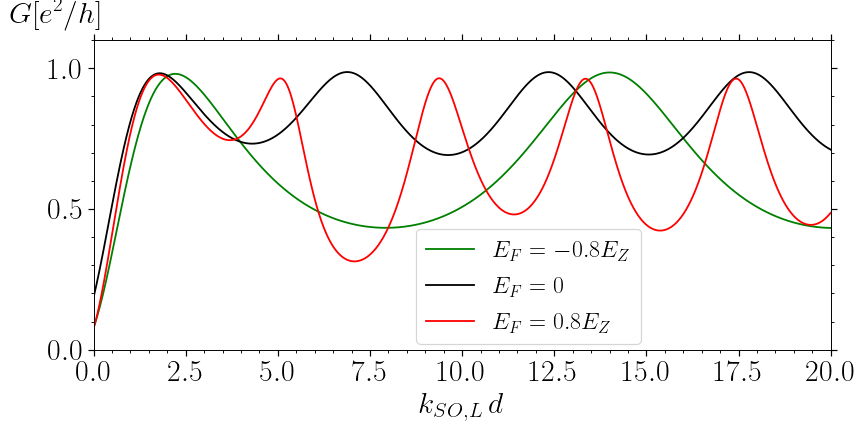

(-1, -0.8)
(-1, 0)
(-1, 0.8)
plots/paper_plots_2/paper/magnetic barier in function of kso*d, Eso=(-3, 0, 1.5).pdf


In [12]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["green", "black", "r"]
for i, k in enumerate([k_list[-1]]+k_list[3:-1]):
    print(k)
    if k[1] == 0:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = 0$", color=colors[i])
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = "f"{k[1]}"r"E_Z$", color=colors[i])


axs.set_ylim(0,1.1)
axs.set_xlim(0, 20)


# axs.grid()
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.59, 0.43))
axs.set_xlabel(x_label[3], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([2.5])
x_minor = np.array([0.5])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


# SAVE = True
SAVE = False

save_path = BASE_PATH+f"magnetic barier in function of kso*d, Eso=(-{alp_l}, 0, {alp_r}).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

### conductance as function $E_{SO, L}/E_{SO, R}$

In [13]:
ev_to_j = 1.602176634e-19
#InSb
m = 0.015*cc.m_e

k_so = np.sqrt(2 *m* 0.3e-3*ev_to_j)/cc.hbar
l_so = 1/k_so
print(f"k_z {k_so}") #1/Metr
print(f"l_so {l_so*10**9:.2f}nm") #Metr

k_z 10867878.84655432
l_so 92.01nm


In [15]:
alp_r =  3
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[0] = x * alp_r
    junction.interface[0] = -par / 2 /np.sqrt(alp_r)
    junction.interface[1] = par /2 / np.sqrt(alp_r)
    try:
        S = junction.get_scattering_matrix(0)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan

# param: k_so,R*d
param = np.array([0.3, 1, 2, 10]) * 100 / 92

print(param)
print(np.array(param)/np.sqrt(alp_r))

# E_so,L/E_so,R
en = np.arange(-25, 25, 0.011)

special_opoints = [0]
err = [0]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

[ 0.32608696  1.08695652  2.17391304 10.86956522]
[0.18826639 0.62755464 1.25510928 6.2755464 ]


<IPython.core.display.Javascript object>


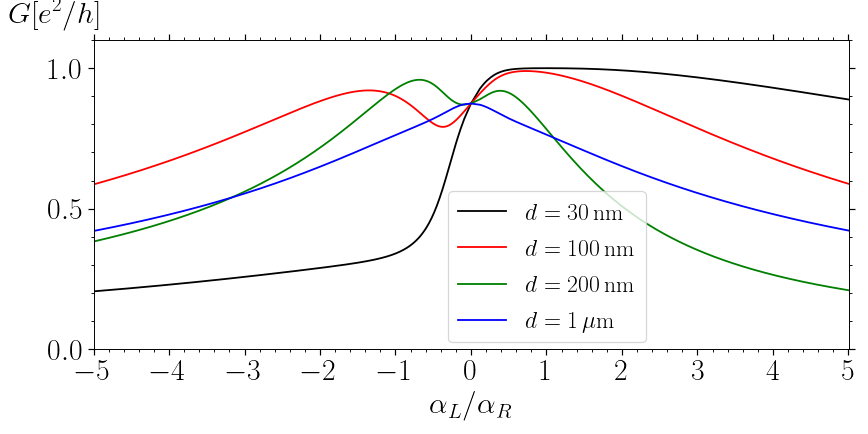

0.32608695652173914
1.0869565217391304
2.1739130434782608
10.869565217391305
plots/paper_plots_2/paper/fig_final/Fig7.pdf


In [17]:
%matplotlib notebook
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "g", "b"]

for i, k in enumerate(k_list):
    print(k)
    if k>10:
        lbl = r"$d = "f"{1}\, \mu "+r"\textrm{m}$"
    else:
        lbl = r"$d = "f"{k*l_so*10**9:.0f}"+r"\, \textrm{nm}$"
    axs.plot(np.sign(en)*np.sqrt(np.abs(en)), trasmission_coeff_total[k][0],
                   label=lbl, color=colors[i])


axs.set_ylim(0,1.1)
axs.set_xlim(-5, 5+0.01)


# axs.grid()
legend_font_size2 = 20
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.6, 0.55))
axs.set_xlabel(r"$\alpha_L/\alpha_R$", fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.2])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


# SAVE = True
SAVE = False

save_path = FINAL_PATH+f"Fig7.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()